In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv
/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv
/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv


#                                               *******Importing Datasets and Merging*******

In [2]:
customer_dataset=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')
geolocation_dataset=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv')
order_items_dataset=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
order_payments_dataset=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv')
order_review_dataset=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv')
order_dataset=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
product_dataset=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')
seller_dataset=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv')
product_name_dataset=pd.read_csv('/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv')

In [3]:
print('Customer Dataset')
display(customer_dataset.head())
print('Geolocation Dataset')
display(geolocation_dataset.head())
print('Ordered Items dataset')
display(order_items_dataset.head())
print('Order Payment dataset')
display(order_payments_dataset.head())
print('order Review Dataset')
display(order_review_dataset.head())
print('Order Dataset')
display(order_dataset.head())
print('Product Dataset')
display(product_dataset.head())
print('Seller Dataset')
display(seller_dataset.head())
print('Product Category Name Translation')
display(product_name_dataset.head())

Customer Dataset


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Geolocation Dataset


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Ordered Items dataset


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Order Payment dataset


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


order Review Dataset


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Order Dataset


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Product Dataset


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Seller Dataset


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Product Category Name Translation


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [4]:
df=order_dataset.merge(order_items_dataset,how='inner',on='order_id')

In [5]:
df=df.merge(order_payments_dataset,how='inner',on='order_id')

In [6]:
df=df.merge(order_review_dataset,how='inner',on='order_id')

In [7]:
df=df.merge(product_dataset,how='inner',on='product_id')

In [8]:
df=df.merge(seller_dataset,how='inner',on='seller_id')

In [9]:
df=df.merge(product_name_dataset,how='inner',on='product_category_name')

In [10]:
df=df.merge(customer_dataset,how='inner',on='customer_id')

In [11]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.0,13.0,9350,maua,SP,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.0,13.0,9350,maua,SP,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.0,13.0,9350,maua,SP,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,13.0,19.0,31570,belo horizonte,SP,perfumery,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,19.0,21.0,14840,guariba,SP,auto,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [12]:
df.shape

(115609, 40)

# *Checking for Null Values and Duplicates*

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   order_purchase_timestamp       115609 non-null  object 
 4   order_approved_at              115595 non-null  object 
 5   order_delivered_carrier_date   114414 non-null  object 
 6   order_delivered_customer_date  113209 non-null  object 
 7   order_estimated_delivery_date  115609 non-null  object 
 8   order_item_id                  115609 non-null  int64  
 9   product_id                     115609 non-null  object 
 10  seller_id                      115609 non-null  object 
 11  shipping_limit_date            115609 non-null  object 
 12  price                         

In [14]:
df.isnull().sum().sort_values(ascending=False)

review_comment_title             101808
review_comment_message            66703
order_delivered_customer_date      2400
order_delivered_carrier_date       1195
order_approved_at                    14
product_width_cm                      1
product_length_cm                     1
product_weight_g                      1
product_height_cm                     1
review_answer_timestamp               0
product_category_name                 0
product_name_lenght                   0
product_description_lenght            0
product_photos_qty                    0
customer_city                         0
customer_zip_code_prefix              0
review_creation_date                  0
seller_city                           0
seller_state                          0
product_category_name_english         0
customer_unique_id                    0
seller_zip_code_prefix                0
order_id                              0
customer_id                           0
shipping_limit_date                   0


In [15]:
df.duplicated().sum()

0

# Dropping Columns with more than 50% null values

In [16]:
data=df.drop(['review_comment_title','review_comment_message'],axis=1)

In [17]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.0,13.0,9350,maua,SP,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.0,13.0,9350,maua,SP,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.0,13.0,9350,maua,SP,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,13.0,19.0,31570,belo horizonte,SP,perfumery,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,19.0,21.0,14840,guariba,SP,auto,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [18]:
#data['product_id'].nunique()

# Data Visualization and EDA

In [19]:
data.nunique().sort_values()

payment_type                         4
review_score                         5
order_status                         7
product_photos_qty                  19
order_item_id                       21
seller_state                        23
payment_installments                24
customer_state                      27
payment_sequential                  29
product_name_lenght                 66
product_category_name               71
product_category_name_english       71
product_width_cm                    95
product_length_cm                   99
product_height_cm                  102
order_estimated_delivery_date      449
seller_city                        604
review_creation_date               632
product_weight_g                  2197
seller_zip_code_prefix            2210
product_description_lenght        2958
seller_id                         3028
customer_city                     4093
price                             5879
freight_value                     6954
customer_zip_code_prefix 

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

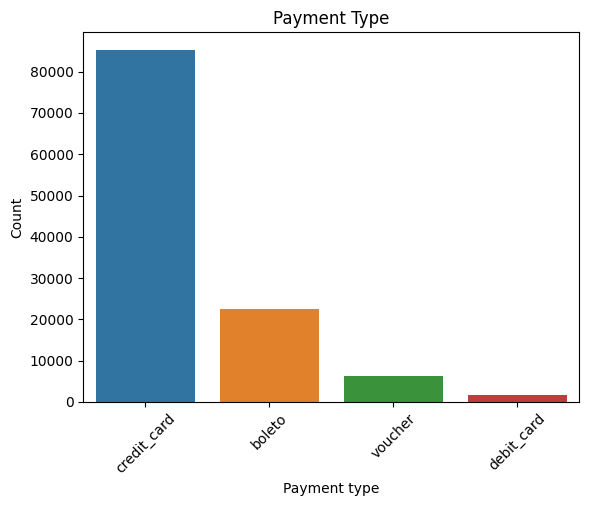

In [21]:
# Visualization for Payment method
sns.countplot(data=data,x=data['payment_type'],order=data['payment_type'].value_counts().index)
plt.title('Payment Type')
plt.xlabel('Payment type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [22]:
# Maximum transactions are done by Credit card

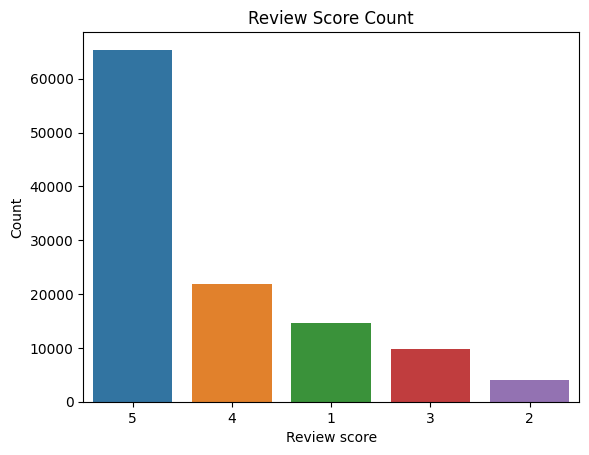

In [23]:
# Visualization of Review Counts
sns.countplot(x=data['review_score'],order=data['review_score'].value_counts().index)
plt.title('Review Score Count')
plt.xlabel('Review score')
plt.ylabel('Count')
plt.show()

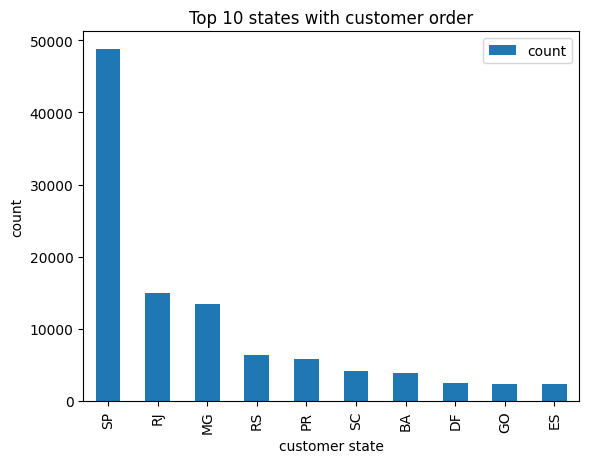

In [24]:
#Top 10 states with order
top_order_state=pd.DataFrame(data['customer_state'].value_counts()).head(10)
#top_order_state.head(10)
top_order_state.plot(kind='bar')
plt.title('Top 10 states with customer order')
plt.xlabel('customer state')
plt.ylabel('count')
plt.show()

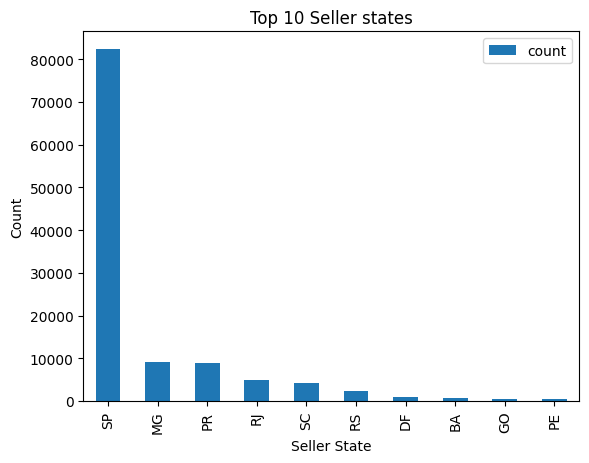

In [25]:
# Top 10 states of Seller
top_seller_state=pd.DataFrame(data['seller_state'].value_counts()).head(10)
top_seller_state.plot(kind='bar')
plt.title('Top 10 Seller states')
plt.xlabel('Seller State')
plt.ylabel('Count')
plt.show()

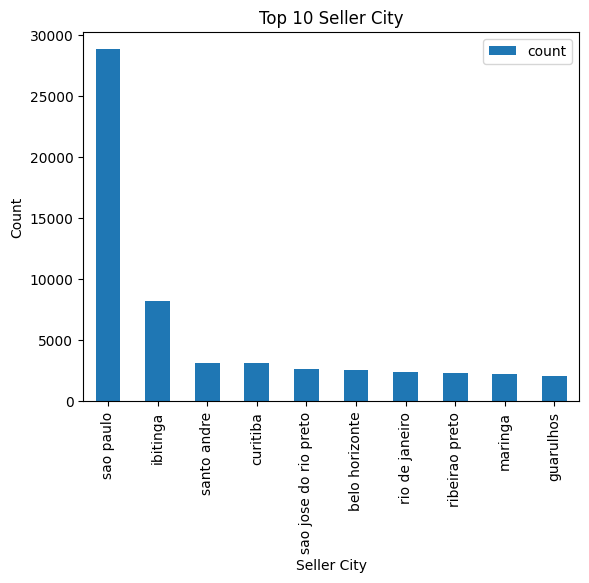

In [26]:
# Top 10 Seller city
top_seller_city=pd.DataFrame(data['seller_city'].value_counts()).head(10)
top_seller_city.plot(kind='bar')
plt.title('Top 10 Seller City')
plt.xlabel('Seller City')
plt.ylabel('Count')
plt.show()

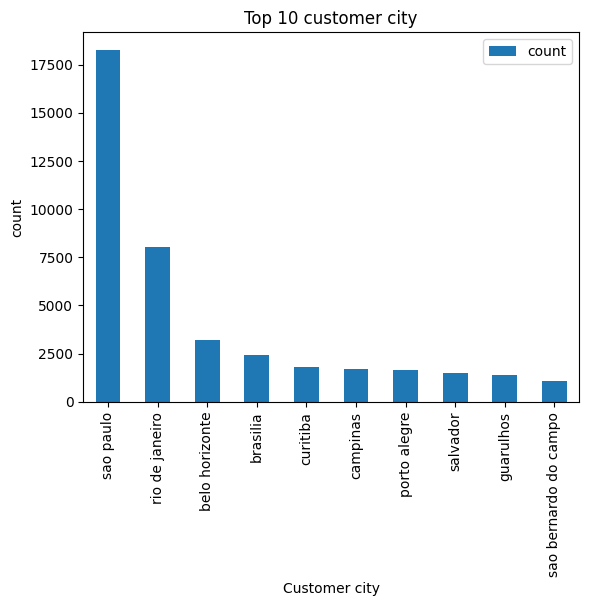

In [27]:
#Top 10 Customer city
top_customer_city=pd.DataFrame(data['customer_city'].value_counts()).head(10)
top_customer_city.plot(kind='bar')
plt.title('Top 10 customer city')
plt.xlabel('Customer city')
plt.ylabel('count')
plt.show()

,product_category_name_english,count
0,bed_bath_table,11847
1,health_beauty,9944
2,sports_leisure,8942
3,furniture_decor,8743
4,computers_accessories,8105
5,housewares,7331
6,watches_gifts,6161
7,telephony,4692
8,garden_tools,4558
9,auto,4356


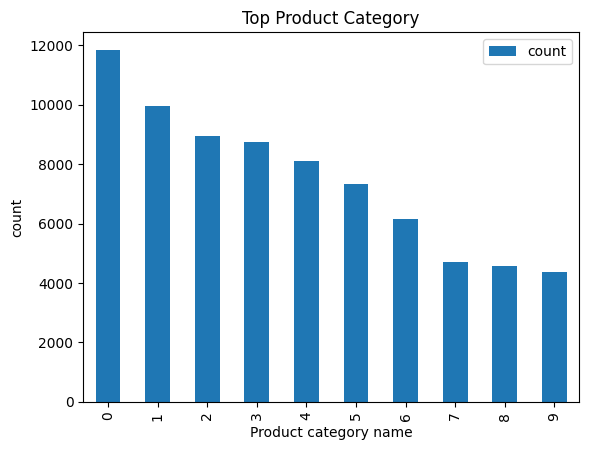

In [28]:
#Top 10 Products
top_products=pd.DataFrame(data['product_category_name_english'].value_counts()).reset_index().head(10)
display(top_products)
top_products.plot(kind='bar')
plt.title('Top Product Category')
plt.xlabel('Product category name')
plt.ylabel('count')
plt.show()


In [29]:
#Highest Reviewed product
top_rated_product=pd.DataFrame(data.groupby('product_category_name_english')['review_score'].count().sort_values(ascending=False)).reset_index().head(10)
top_rated_product

,product_category_name_english,review_score
0,bed_bath_table,11847
1,health_beauty,9944
2,sports_leisure,8942
3,furniture_decor,8743
4,computers_accessories,8105
5,housewares,7331
6,watches_gifts,6161
7,telephony,4692
8,garden_tools,4558
9,auto,4356


In [30]:
#Revenue generating products
revenue_gen_product=pd.DataFrame(data.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False)).reset_index().head(10)
revenue_gen_product

,product_category_name_english,price
0,health_beauty,1290883.52
1,watches_gifts,1245783.11
2,bed_bath_table,1095770.05
3,sports_leisure,1022489.29
4,computers_accessories,944992.54
5,furniture_decor,765336.72
6,housewares,664226.76
7,cool_stuff,655820.40
8,auto,608914.30
9,garden_tools,515987.77


In [31]:
# Product with highest freight value
high_freight_value=pd.DataFrame(data.groupby('product_category_name_english')['freight_value'].sum().sort_values(ascending=False)).reset_index().head(10)
high_freight_value

,product_category_name_english,freight_value
0,bed_bath_table,217807.32
1,health_beauty,187978.10
2,furniture_decor,181307.11
3,sports_leisure,174330.59
4,housewares,153848.83
5,computers_accessories,153483.43
6,garden_tools,105236.25
7,watches_gifts,103643.12
8,auto,95104.30
9,cool_stuff,87084.75
